In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## read_csv로 데이터를 DataFrame형태로 불러옴

In [3]:
file_path = 'drinks/drinks.csv'
drinks = pd.read_csv(file_path)

- info() 함수를 통해 결측(NaN)값을 확인할 수 있다.

In [4]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [5]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [6]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson') # 상관계수
print(corr)

beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [8]:
cols=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


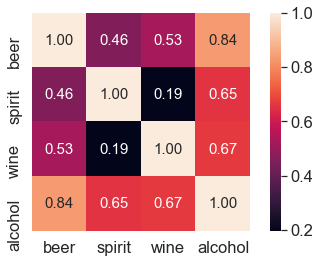

In [9]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

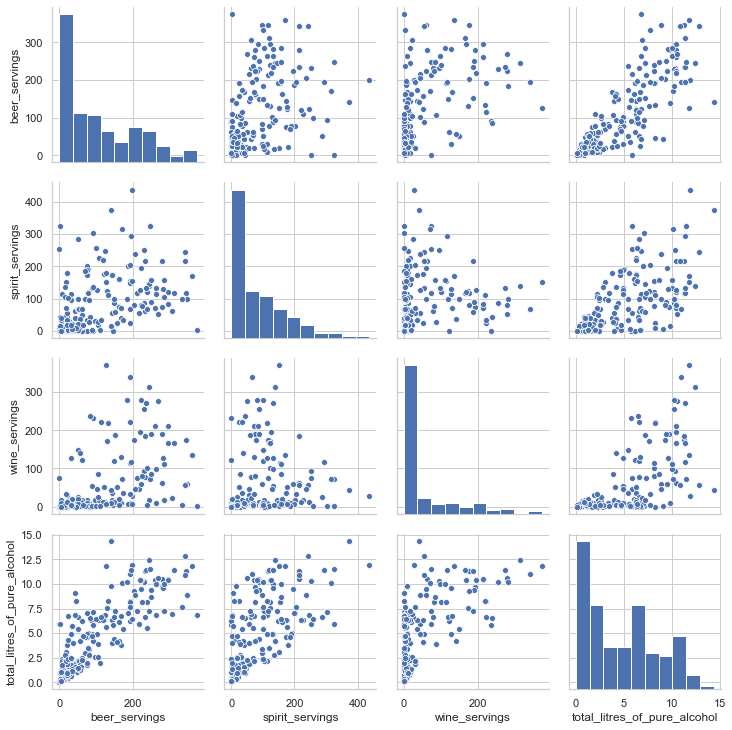

In [10]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

### 결측 데이터 전처리

In [11]:
print(drinks.isnull().sum())
print('-------------------------------------------')
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
-------------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


- 결측 데이터 채우기

In [12]:
drinks['continent'] = drinks['continent'].fillna('OT')

In [13]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [14]:
print(drinks.isnull().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


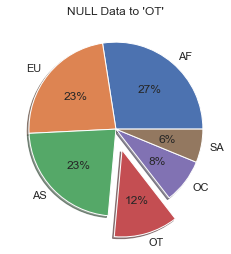

In [15]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)# 강조
plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title("NULL Data to 'OT'")
plt.show()

In [16]:
labels = drinks['continent'].value_counts().index.tolist()
labels

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [17]:
fracs1 = drinks['continent'].value_counts().values.tolist()
fracs1

[53, 45, 44, 23, 16, 12]

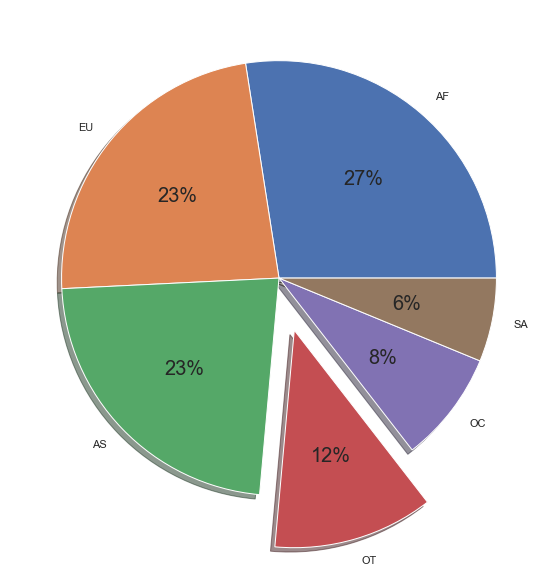

In [18]:
plt.figure(figsize=(10, 10))
plt.rc('font',size=20)
plt.pie(fracs1,
        explode=explode, 
        labels=labels, 
        colors=None, 
        autopct='%.0f%%', 
        pctdistance=0.6, 
        shadow=True, 
        labeldistance=1.1, 
        startangle=None, 
        radius=None, 
        counterclock=True,
        wedgeprops=None,
        textprops=None, 
        center=(0, 0), 
        frame=False, 
        rotatelabels=False, 
        data=None)
plt.show()
plt.rc('font',size=10)

In [19]:
result = drinks.groupby('continent').spirit_servings.\
         agg(['count','mean', 'min','max','sum','var','std'])
result

,count,mean,min,max,sum,var,std
continent,,,,,,,
AF,53,16.339623,0,152,866,789.767054,28.102794
AS,44,60.840909,0,326,2677,7116.974101,84.362160
EU,45,132.555556,0,373,5965,6020.070707,77.589115
OC,16,58.437500,0,254,935,4970.929167,70.504817
OT,23,165.739130,68,438,3812,9023.837945,94.993884
SA,12,114.750000,25,302,1377,5940.931818,77.077440


In [20]:
result = drinks.groupby('continent').beer_servings.\
         agg(['count','mean', 'min','max','sum','var','std'])
result

,count,mean,min,max,sum,var,std
continent,,,,,,,
AF,53,61.471698,0,376,3258,6489.561684,80.557816
AS,44,37.045455,0,247,1630,2447.253700,49.469725
EU,45,193.777778,0,361,8720,9926.449495,99.631569
OC,16,89.687500,0,306,1435,9339.562500,96.641412
OT,23,145.434783,1,285,3345,6339.529644,79.621163
SA,12,175.083333,93,333,2101,4256.628788,65.242845


In [21]:
result = drinks.groupby('continent').wine_servings.\
         agg(['count','mean', 'min','max','sum','var','std'])
result

,count,mean,min,max,sum,var,std
continent,,,,,,,
AF,53,16.264151,0,233,862,1509.044267,38.846419
AS,44,9.068182,0,123,399,469.460359,21.667034
EU,45,142.222222,0,370,6400,9490.994949,97.421738
OC,16,35.625000,0,212,570,4167.450000,64.555790
OT,23,24.521739,1,100,564,798.988142,28.266378
SA,12,62.416667,1,221,749,7853.537879,88.620189


In [22]:
result = drinks.groupby('continent').total_litres_of_pure_alcohol.\
         agg(['count','mean', 'min','max','sum','var','std'])
result

,count,mean,min,max,sum,var,std
continent,,,,,,,
AF,53,3.007547,0.0,9.1,159.4,7.009557,2.647557
AS,44,2.170455,0.0,11.5,95.5,7.674223,2.770239
EU,45,8.617778,0.0,14.4,387.8,11.279222,3.358455
OC,16,3.381250,0.0,10.4,54.1,11.193625,3.345688
OT,23,5.995652,2.2,11.9,137.9,5.804980,2.409353
SA,12,6.308333,3.8,8.3,75.7,2.344470,1.531166


- total_litres_of_pure_alcohol의 전체평균

In [23]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [24]:
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [25]:
continent_over_mean = continent_mean(continent_mean >= total_mean)
print(continent_over_mean)

TypeError: 'Series' object is not callable

- 평균 beer_servings가 가장 높은 대륙
- 평균 beer_servings가 가장 낮은 대륙

In [ ]:
beer_continent = drinks.groupby('continent').beer_servings.mean()
beer_continent

In [ ]:
beer_continent_max = beer_continent[beer_continent == beer_continent.max()]
beer_continent_max

In [ ]:
beer_continent[beer_continent.idxmax()]

In [ ]:
beer_continent_min = beer_continent[beer_continent == beer_continent.min()]
beer_continent_min

In [ ]:
beer_continent[beer_continent.idxmin()]

## 시각화
-   대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화

In [ ]:
result = drinks.groupby('continent').spirit_servings.\
         agg(['mean', 'min','max','count'])
result

In [ ]:
num_groups = len(result.index)
num_groups

In [ ]:
means = result['mean'].tolist()
means

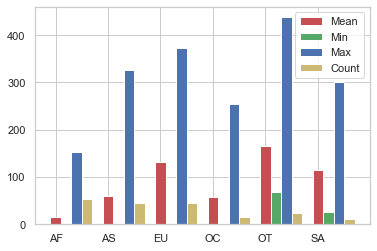

In [34]:
mins = result['min'].tolist()
maxs = result['max'].tolist()
counts = result['count'].tolist()
index = np.arange(num_groups)
bar_width = 0.2

rects_1 = plt.bar(index,means,bar_width, color = 'r', label = 'Mean')
rects_2 = plt.bar(index+bar_width,mins,bar_width, color = 'g', label = 'Min')
rects_3 = plt.bar(index+bar_width*2,maxs,bar_width, color = 'b', label = 'Max')
rects_4 = plt.bar(index+bar_width*3,counts,bar_width, color = 'y', label = 'Count')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

- 대륙별 total_liters_of_pure_alcohol 사각화

In [35]:
continents = continent_mean.index.tolist()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [36]:
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']

In [37]:
continents.append('MEAN')
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'MEAN']

In [38]:
x_pos = np.arange(len(continents))

In [39]:
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 3.3812500000000005,
 5.995652173913044,
 6.308333333333334,
 4.717098445595855]

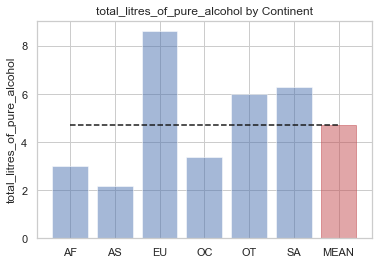

In [40]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

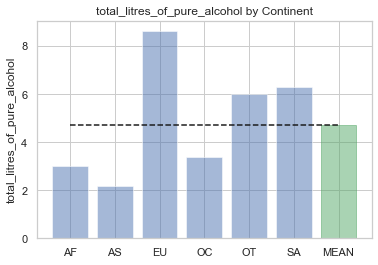

In [41]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('g')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

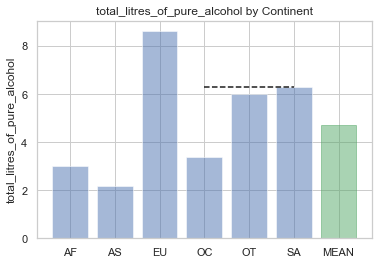

In [42]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('g')
plt.plot([3., 5], [continent_mean['SA'], continent_mean['SA']], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [43]:
!pip install scipy

In [44]:
africa = drinks.loc[drinks['continent'] == 'AF']
africa.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF
27,Burundi,88,0,0,6.3,AF
28,Cote d'Ivoire,37,1,7,4.0,AF
29,Cabo Verde,144,56,16,4.0,AF
31,Cameroon,147,1,4,5.8,AF
33,Central African Republic,17,2,1,1.8,AF


In [45]:
europe = drinks.loc[drinks['continent'] == 'EU']
europe.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [46]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [47]:
drinks['total_servings'] = drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

In [48]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [49]:
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [50]:
drinks.round(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.00
1,Albania,89,132,54,4.9,EU,275,0.02
2,Algeria,25,0,14,0.7,AF,39,0.02
3,Andorra,245,138,312,12.4,EU,695,0.02
4,Angola,217,57,45,5.9,AF,319,0.02
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.02
189,Vietnam,111,2,1,2.0,AS,114,0.02
190,Yemen,6,0,0,0.1,AS,6,0.02
191,Zambia,32,19,4,2.5,AF,55,0.05


In [51]:
country_rank = drinks[['country', 'alcohol_rate']]
country_rank = country_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_rank.head(10)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


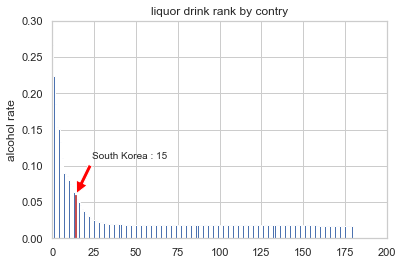

In [52]:
country_list = country_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_rank[country_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

- total_litres_of_pure_alcohol 평균을 구하기
- 이 평균값보다 적은 알코올을 섭취하는 대륙중에서 spirit을 가장 많이 마시는 국가를 구해보자

In [53]:
total_alcohol = drinks['total_litres_of_pure_alcohol'].mean()

In [54]:
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [55]:
continent_under_mean = continent_mean[continent_mean <= total_mean]
continent_under_mean

continent
AF    3.007547
AS    2.170455
OC    3.381250
Name: total_litres_of_pure_alcohol, dtype: float64

In [56]:
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
continent_under_mean

['AF', 'AS', 'OC']

In [58]:
df_continent_under_mean = drinks.loc[drinks.continent.isin(continent_under_mean)]
df_continent_under_mean

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
2,Algeria,25,0,14,0.7,AF,39,0.017949
4,Angola,217,57,45,5.9,AF,319,0.018495
8,Australia,261,72,212,10.4,OC,545,0.019083
12,Bahrain,42,63,7,2.0,AS,112,0.017857
...,...,...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC,50,0.018000
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [57]:
drinks.groupby('continent')

In [247]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495


In [ ]:
under_total

In [244]:
under_total = []
index_count = 0
for chk in continent_under_mean.index:
    for item in drinks['continent'] :
        if  (chk == item) :
            under_total.append(drinks.iloc[index_count])
        index_count +=1
    index_count = 0
under_total = pd.DataFrame(under_total)
under_total = under_total.sort_index()
under_total

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
2,Algeria,25,0,14,0.7,AF,39,0.017949
4,Angola,217,57,45,5.9,AF,319,0.018495
8,Australia,261,72,212,10.4,OC,545,0.019083
12,Bahrain,42,63,7,2.0,AS,112,0.017857
...,...,...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC,50,0.018000
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [245]:
under_total[under_total['spirit_servings'] == under_total['spirit_servings'].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
141,Russian Federation,247,326,73,11.5,AS,646,0.017802
